In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style for readability
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Load the combined streaming history CSV (created by your data_ingestion.py script)
df = pd.read_csv('../data/combined_history.csv')

# Preview the data
df.head()

/var/folders/6t/mkkzw41x2hs1y0vjp__7m08h0000gn/T/ipykernel_15452/1976629625.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/combined_history.csv')


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2024-11-22T05:25:43Z,ios,235113,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,Lisztomania,Phoenix,Wolfgang Amadeus Phoenix,spotify:track:4esUVfYnFcCCVHntx9FQCb,NaN,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1.732253e+09,False
1,2024-11-22T05:28:28Z,ios,169620,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,Baby I'm Yours,Breakbot,By Your Side,spotify:track:0tZkVZ9DeAa0MNK2gY5NtV,NaN,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,1.732253e+09,False
2,2024-11-22T05:29:12Z,ios,47731,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,Alive,Empire Of The Sun,Ice On The Dune,spotify:track:5WBnKCEsPwsvWHUZmLjS3s,NaN,...,NaN,NaN,NaN,trackdone,fwdbtn,False,True,False,1.732253e+09,False
3,2024-11-22T05:31:52Z,ios,161000,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,"Signed, Sealed, Delivered (I'm Yours)",Stevie Wonder,Signed Sealed And Delivered,spotify:track:0kzhMZZNmxiLG7qyJhVBHB,NaN,...,NaN,NaN,NaN,fwdbtn,trackdone,False,False,False,1.732253e+09,False
4,2024-11-22T05:33:46Z,ios,111131,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,Una Playa En Nayarit,Little Jesus,El Show Debe Continuar,spotify:track:3OFqCKshLpPOH7198L3YyP,NaN,...,NaN,NaN,NaN,trackdone,fwdbtn,False,True,False,1.732254e+09,False


In [4]:
print("DataFrame shape:", df.shape)
print("\nColumns:\n", df.columns)

DataFrame shape: (38437, 23)

Columns:
 Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38437 entries, 0 to 38436
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 38437 non-null  object 
 1   platform                           38437 non-null  object 
 2   ms_played                          38437 non-null  int64  
 3   conn_country                       38437 non-null  object 
 4   ip_addr                            38437 non-null  object 
 5   master_metadata_track_name         38333 non-null  object 
 6   master_metadata_album_artist_name  38333 non-null  object 
 7   master_metadata_album_album_name   38333 non-null  object 
 8   spotify_track_uri                  38333 non-null  object 
 9   episode_name                       104 non-null    object 
 10  episode_show_name                  104 non-null    object 
 11  spotify_episode_uri                104 non-null    obj

In [6]:
df.describe(include='all')

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
count,38437,38437,3.843700e+04,38437,38437,38333,38333,38333,38333,104,...,0.0,0.0,0.0,38437,38437,38437,38437,38304,3.786400e+04,38437
unique,37927,8,NaN,15,1247,11220,4194,8408,12630,59,...,NaN,NaN,NaN,9,10,2,2,2,NaN,2
top,2023-02-20T17:33:09Z,ios,NaN,US,205.178.78.8,Palmar,Rawayana,Un Verano Sin Ti,spotify:track:7gihyFRDXY36xR9SPutw3d,Billions Club Live with The Weeknd: A Concert ...,...,NaN,NaN,NaN,trackdone,fwdbtn,False,True,False,NaN,False
freq,6,33926,NaN,38260,8802,92,1100,415,87,7,...,NaN,NaN,NaN,17115,16398,27324,20672,38232,NaN,38386
mean,NaN,NaN,1.175477e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.711576e+09,NaN
std,NaN,NaN,1.363198e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.149208e+07,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.665791e+09,NaN
25%,NaN,NaN,3.227000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700591e+09,NaN
50%,NaN,NaN,1.271190e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.715989e+09,NaN
75%,NaN,NaN,2.019350e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.729115e+09,NaN


In [7]:
# Example renames (adjust to your actual column names)
rename_dict = {
    'master_metadata_track_name': 'track_name',
    'master_metadata_album_artist_name': 'artist_name',
    'master_metadata_album_album_name': 'album_name',
    'ms_played': 'ms_played',
    # Add more renames if needed
}

df.rename(columns=rename_dict, inplace=True)

# Convert timestamps if you have a 'ts' or 'endTime' column
if 'ts' in df.columns:
    df['ts'] = pd.to_datetime(df['ts'])
    df['hour'] = df['ts'].dt.hour
    df['day_of_week'] = df['ts'].dt.day_name()

# Create a new column for minutes played (if ms_played exists)
if 'ms_played' in df.columns:
    df['minutes_played'] = df['ms_played'] / 60000.0

# Dropping columns not needed
columns_to_drop = [
    "episode_name",
    "episode_show_name",
    "spotify_episode_uri",
    "audiobook_title",
    "audiobook_uri",
    "audiobook_chapter_uri",
    "audiobook_chapter_title"
]

df.drop(columns=columns_to_drop, inplace=True, errors="ignore")

df.head()


,ts,platform,ms_played,conn_country,ip_addr,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,hour,day_of_week,minutes_played
0,2024-11-22 05:25:43+00:00,ios,235113,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,Lisztomania,Phoenix,Wolfgang Amadeus Phoenix,spotify:track:4esUVfYnFcCCVHntx9FQCb,trackdone,trackdone,False,False,False,1.732253e+09,False,5,Friday,3.918550
1,2024-11-22 05:28:28+00:00,ios,169620,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,Baby I'm Yours,Breakbot,By Your Side,spotify:track:0tZkVZ9DeAa0MNK2gY5NtV,trackdone,trackdone,False,False,False,1.732253e+09,False,5,Friday,2.827000
2,2024-11-22 05:29:12+00:00,ios,47731,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,Alive,Empire Of The Sun,Ice On The Dune,spotify:track:5WBnKCEsPwsvWHUZmLjS3s,trackdone,fwdbtn,False,True,False,1.732253e+09,False,5,Friday,0.795517
3,2024-11-22 05:31:52+00:00,ios,161000,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,"Signed, Sealed, Delivered (I'm Yours)",Stevie Wonder,Signed Sealed And Delivered,spotify:track:0kzhMZZNmxiLG7qyJhVBHB,fwdbtn,trackdone,False,False,False,1.732253e+09,False,5,Friday,2.683333
4,2024-11-22 05:33:46+00:00,ios,111131,US,2607:fb90:a1a0:9184:9565:88e9:704:e75c,Una Playa En Nayarit,Little Jesus,El Show Debe Continuar,spotify:track:3OFqCKshLpPOH7198L3YyP,trackdone,fwdbtn,False,True,False,1.732254e+09,False,5,Friday,1.852183


# Overall Listening Stats

In [8]:
if 'minutes_played' in df.columns:
    total_minutes = df['minutes_played'].sum()
    print(f"Total minutes listened: {total_minutes:.2f}")

if 'track_name' in df.columns:
    unique_tracks = df['track_name'].nunique()
    print(f"Unique tracks: {unique_tracks}")

if 'artist_name' in df.columns:
    unique_artists = df['artist_name'].nunique()
    print(f"Unique artists: {unique_artists}")

Total minutes listened: 75303.03
Unique tracks: 11220
Unique artists: 4194


# Top 10 Artists by Listening Time

Top 10 Artists by Total ms_played:
artist_name
Rawayana           150574199
Bad Bunny          111869661
Caloncho           110332948
Juan Pablo Vega    104548988
Jorge Drexler       96194739
El Zar              64892059
Calle 13            63874655
Little Jesus        52470935
Vicente Garcia      51222712
Elsa y Elmar        47611143
Name: ms_played, dtype: int64


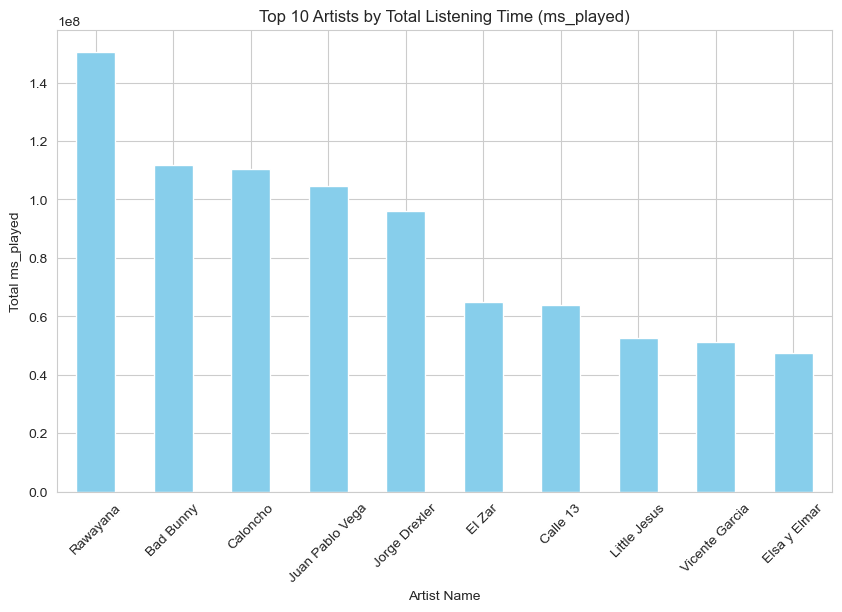

In [9]:
if 'artist_name' in df.columns and 'ms_played' in df.columns:
    top_artists = (df.groupby('artist_name')['ms_played']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))

    print("Top 10 Artists by Total ms_played:")
    print(top_artists)

    # Plot
    plt.figure(figsize=(10,6))
    top_artists.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Artists by Total Listening Time (ms_played)')
    plt.xlabel('Artist Name')
    plt.ylabel('Total ms_played')
    plt.xticks(rotation=45)
    plt.show()

# Top 10 Artists by Count

Top 10 Artists by Count of Songs:
Rawayana           1100
Caloncho            891
Bad Bunny           822
Juan Pablo Vega     710
Jorge Drexler       595
El Zar              449
Calle 13            408
Vicente Garcia      392
Elsa y Elmar        373
Little Jesus        314
Name: artist_name, dtype: int64


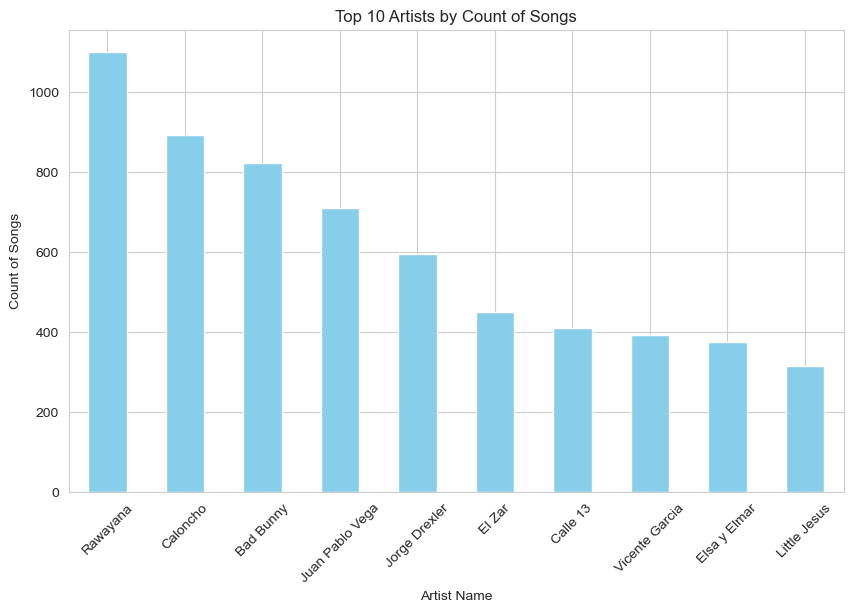

In [47]:
if 'artist_name' in df.columns:
    # Count the number of rows per artist
    top_artists_count = df['artist_name'].value_counts().head(10)
    
    print("Top 10 Artists by Count of Songs:")
    print(top_artists_count)
    
    # Plotting
    plt.figure(figsize=(10,6))
    top_artists_count.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Artists by Count of Songs')
    plt.xlabel('Artist Name')
    plt.ylabel('Count of Songs')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'artist_name' not found in the DataFrame.")

# Top 10 Tracks by Listening Time

Top 10 Tracks by Total ms_played:
track_name
La Declaración          18621646
Lo Volvería             14624280
Todo se transforma      14507537
Caney                   14465902
Amuleto                 13544091
Váyanse Todos A Mamá    12420654
Departamento            11003546
Amiga Mía               10468199
Ese Vato No Te Queda    10130349
Viviré para Ti          10066326
Name: ms_played, dtype: int64


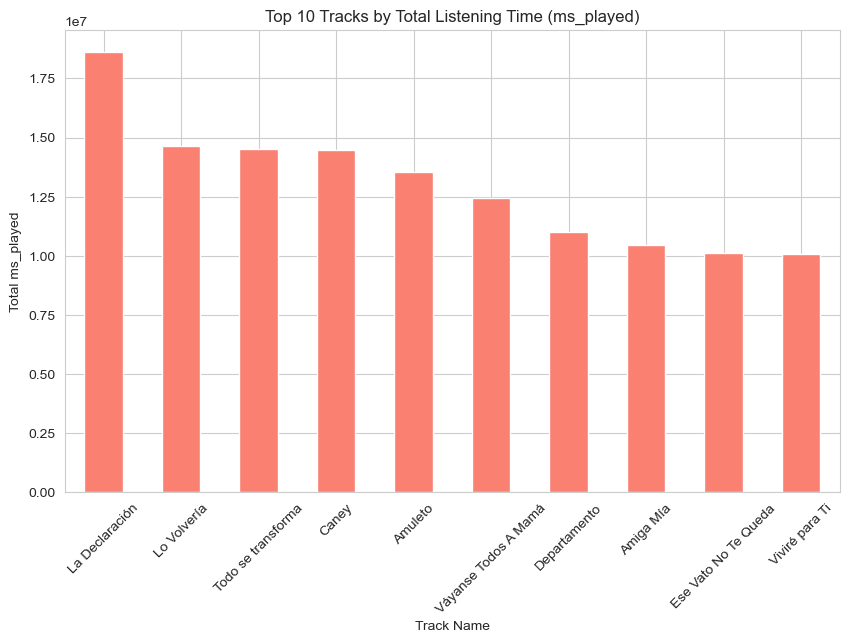

In [10]:
if 'track_name' in df.columns and 'ms_played' in df.columns:
    top_tracks = (df.groupby('track_name')['ms_played']
                  .sum()
                  .sort_values(ascending=False)
                  .head(10))

    print("Top 10 Tracks by Total ms_played:")
    print(top_tracks)

    # Plot
    plt.figure(figsize=(10,6))
    top_tracks.plot(kind='bar', color='salmon')
    plt.title('Top 10 Tracks by Total Listening Time (ms_played)')
    plt.xlabel('Track Name')
    plt.ylabel('Total ms_played')
    plt.xticks(rotation=45)
    plt.show()


"Ese Vato No Te Queda" is an outlier for sure. I have never listened to this song before. All the reproductions (52) happened within a couple of days. So either I left my Spotify on and this song played, or shared my phone in a social gathering and someone else played this song, but honestly I've never listened to it before.

track_name
La Declaración          18621646
Lo Volvería             14624280
Todo se transforma      14507537
Caney                   14465902
Amuleto                 13544091
Váyanse Todos A Mamá    12420654
Departamento            11003546
Amiga Mía               10468199
Viviré para Ti          10066326
El Momento Perfecto     10057805
Name: ms_played, dtype: int64


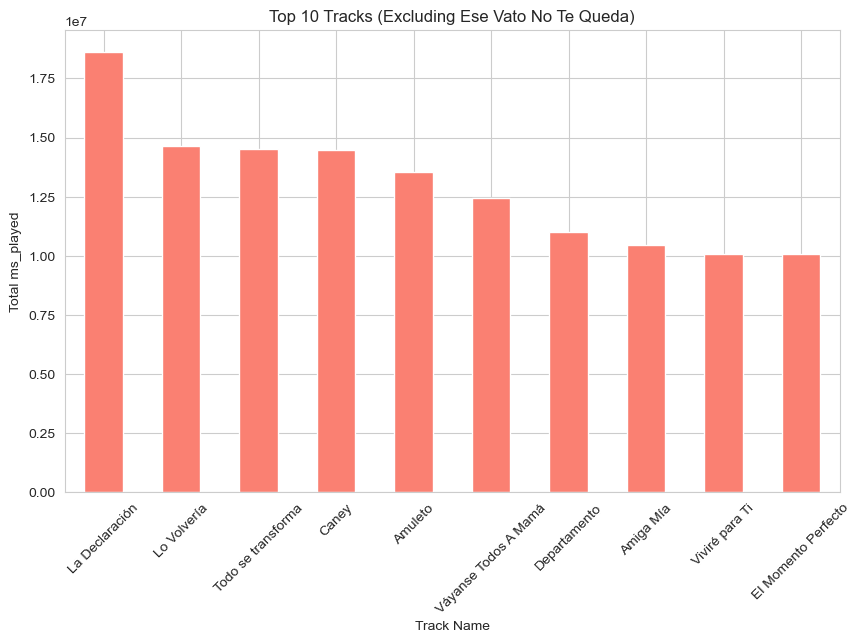

In [13]:
top_tracks_excluding_ese_vato = (
    df[df['track_name'] != 'Ese Vato No Te Queda']
    .groupby('track_name')['ms_played']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_tracks_excluding_ese_vato)

# Plot
plt.figure(figsize=(10,6))
top_tracks_excluding_ese_vato.plot(kind='bar', color='salmon')
plt.title('Top 10 Tracks (Excluding Ese Vato No Te Queda)')
plt.xlabel('Track Name')
plt.ylabel('Total ms_played')
plt.xticks(rotation=45)
plt.show()


# Top 10 Tracks by Count of Occurrences

Top 10 Tracks by Count of Occurrences:
Palmar                     92
Lo Volvería                90
Amuleto                    86
La Declaración             85
Caney                      82
Tan Difícil de Entender    79
Brillo Mio                 78
Somos Instantes            77
Todo se transforma         75
Siento por Ciento          72
Name: track_name, dtype: int64


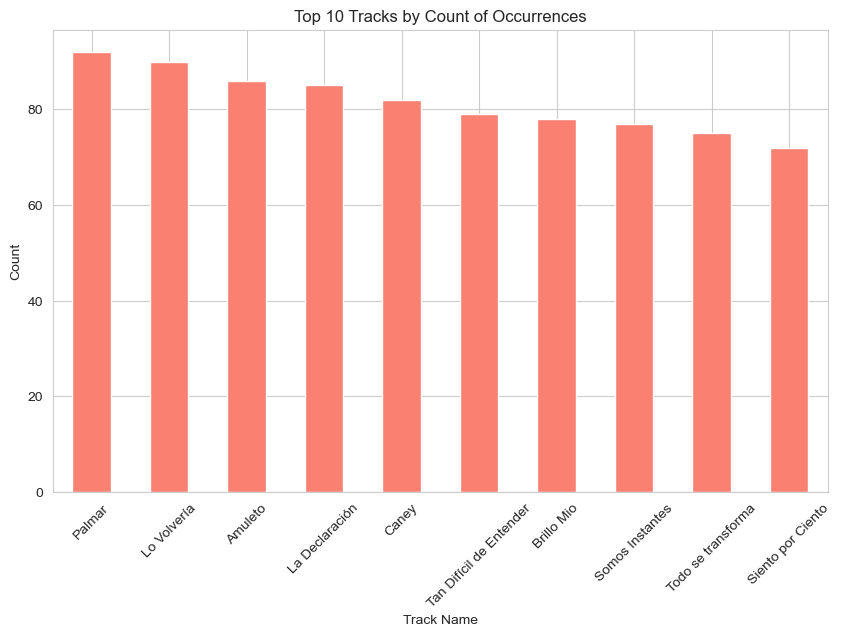

In [48]:
if 'track_name' in df.columns:
    # Count the number of times each track appears
    top_tracks_count = df['track_name'].value_counts().head(10)
    
    print("Top 10 Tracks by Count of Occurrences:")
    print(top_tracks_count)
    
    # Plot the top 10 tracks by count
    plt.figure(figsize=(10,6))
    top_tracks_count.plot(kind='bar', color='salmon')
    plt.title('Top 10 Tracks by Count of Occurrences')
    plt.xlabel('Track Name')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'track_name' not found in the DataFrame.")

# Listening Patterns by Time of Day

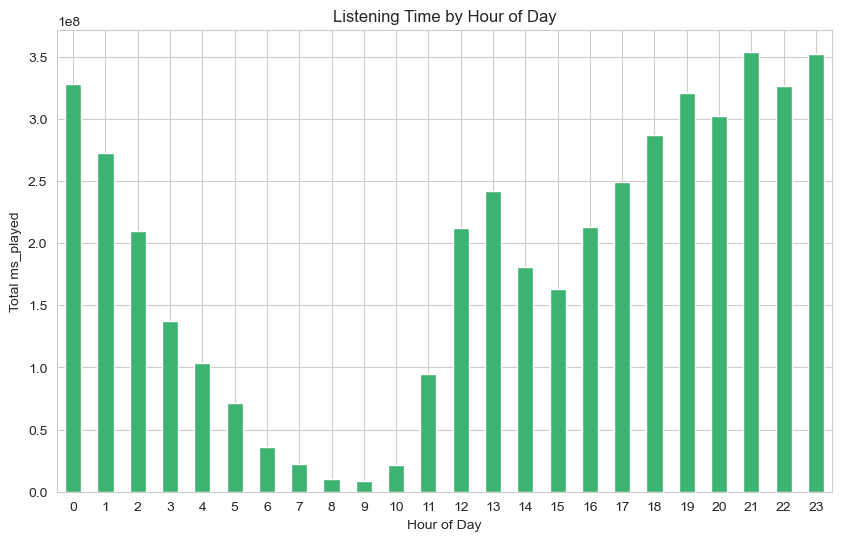

In [14]:
if 'hour' in df.columns and 'ms_played' in df.columns:
    hourly_usage = df.groupby('hour')['ms_played'].sum()

    plt.figure(figsize=(10,6))
    hourly_usage.plot(kind='bar', color='mediumseagreen')
    plt.title('Listening Time by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total ms_played')
    plt.xticks(rotation=0)
    plt.show()



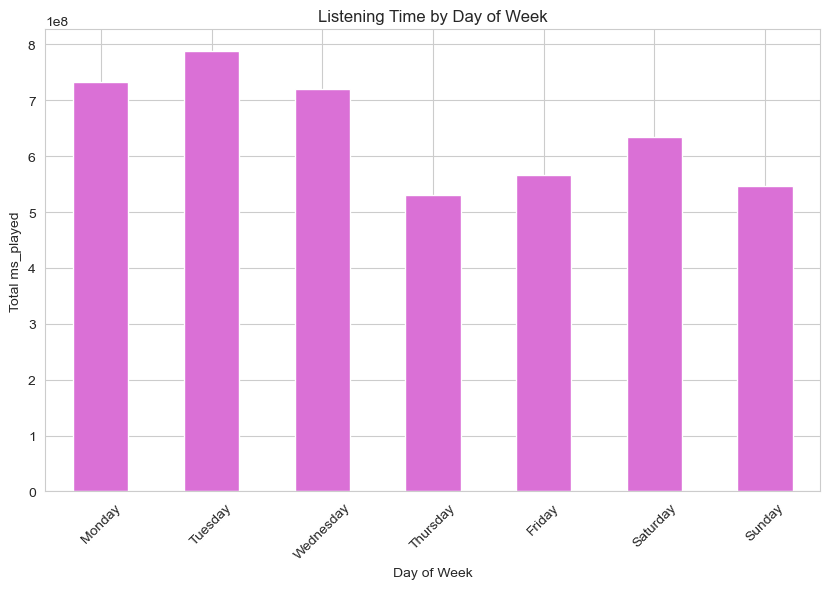

In [15]:
if 'day_of_week' in df.columns and 'ms_played' in df.columns:
    dow_usage = df.groupby('day_of_week')['ms_played'].sum()

    # Optional: reorder days
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_usage = dow_usage.reindex(day_order)

    plt.figure(figsize=(10,6))
    dow_usage.plot(kind='bar', color='orchid')
    plt.title('Listening Time by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Total ms_played')
    plt.xticks(rotation=45)
    plt.show()


Makes sense considering I was at a job from September 2023 through November 2024 where I commuted for approximately 2 hours/day Monday - Wednesday.

# Listening Time by Time of Day and Day of Week

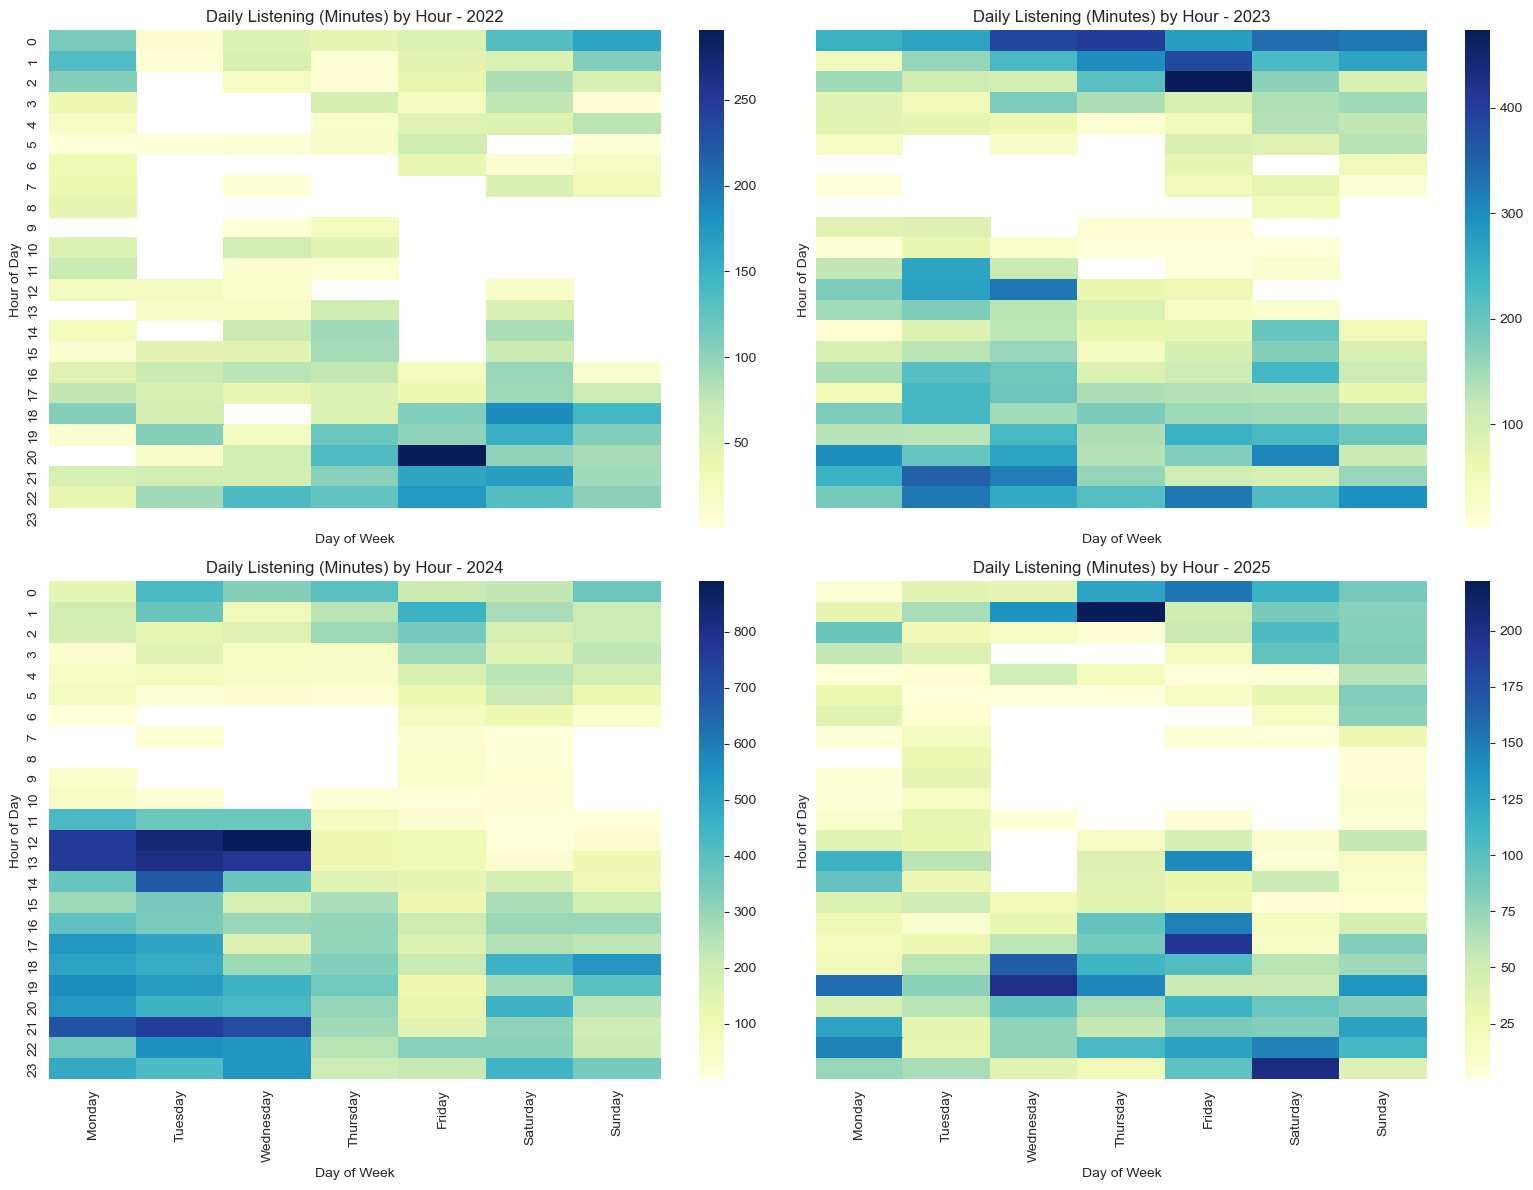

In [52]:
# Create a copy of the original DataFrame for heatmap analysis
df_heatmap = df.copy()

# Ensure the timestamp column is in datetime format
df_heatmap['ts'] = pd.to_datetime(df_heatmap['ts'])

# Derive additional time-related columns
df_heatmap['hour'] = df_heatmap['ts'].dt.hour
df_heatmap['day_of_week'] = df_heatmap['ts'].dt.day_name()
df_heatmap['year'] = df_heatmap['ts'].dt.year

# Function to create a pivot table for the heatmap
def create_heatmap_data(data):
    # Group by hour and day_of_week, summing ms_played
    grouped = data.groupby(['hour', 'day_of_week'])['ms_played'].sum().reset_index()
    # Pivot the data so that rows are hours and columns are days
    pivot = grouped.pivot(index='hour', columns='day_of_week', values='ms_played')
    # Convert ms to minutes
    pivot = pivot / 60000.0
    # Reorder columns according to the standard week order
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pivot = pivot[day_order]
    return pivot

# Define the years we want to analyze
years_to_plot = [2022, 2023, 2024, 2025]

# Create a dictionary to hold the pivot tables for each year
heatmaps = {}

for year in years_to_plot:
    df_year = df_heatmap[df_heatmap['year'] == year]
    heatmaps[year] = create_heatmap_data(df_year)

# Plot the heatmaps in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

for idx, year in enumerate(years_to_plot):
    sns.heatmap(heatmaps[year], cmap='YlGnBu', annot=False, ax=axes[idx])
    axes[idx].set_title(f"Daily Listening (Minutes) by Hour - {year}")
    axes[idx].set_xlabel("Day of Week")
    axes[idx].set_ylabel("Hour of Day")

plt.tight_layout()
plt.show()

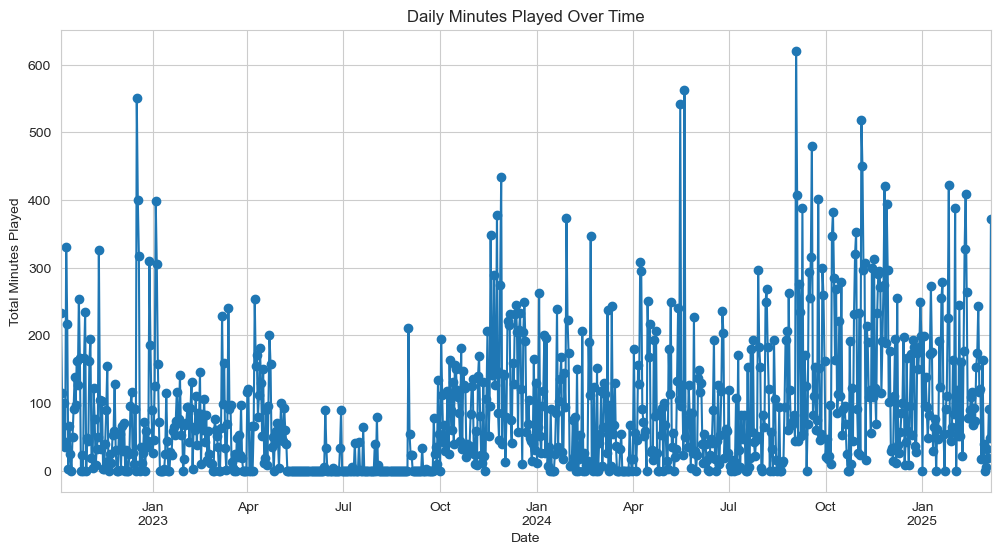

In [16]:
# Ensure the timestamp column is in datetime format. Here we assume it's named 'ts'
# If it's named something else (like 'endTime'), adjust accordingly.
if 'ts' in df.columns:
    df['ts'] = pd.to_datetime(df['ts'])

# Resample the data by day and sum the minutes played for each day
daily_minutes = df.resample('D', on='ts')['minutes_played'].sum()

# Plot the time series
plt.figure(figsize=(12,6))
daily_minutes.plot(kind='line', marker='o')
plt.title('Daily Minutes Played Over Time')
plt.xlabel('Date')
plt.ylabel('Total Minutes Played')
plt.grid(True)
plt.show()


In [17]:
# Ensure your timestamp column is named 'ts' and is in datetime format
# If it's named differently, adjust the code below.

df['ts'] = pd.to_datetime(df['ts'])

# Create a separate column for date only (no time)
df['date_only'] = df['ts'].dt.date

# Group by date_only and sum minutes_played
daily_totals = (df.groupby('date_only')['minutes_played']
                  .sum()
                  .sort_values(ascending=False))

# Extract the top 10 dates with highest total minutes
top_10_dates = daily_totals.head(10)
top_10_dates


date_only
2024-09-03    620.087700
2024-05-20    562.186667
2022-12-17    550.471817
2024-05-16    541.298183
2024-11-04    518.655750
2024-09-18    479.914250
2024-11-05    450.544533
2023-11-28    433.348900
2025-01-26    422.678533
2024-11-26    421.170300
Name: minutes_played, dtype: float64

In [18]:
# Convert the top_10_dates index to a list of actual date objects
dates_list = top_10_dates.index.tolist()

results = {}  # Dictionary to store results for each date

for d in dates_list:
    # Filter the DataFrame for this specific date
    subset = df[df['date_only'] == d]
    
    # Group by track_name and sum minutes_played
    top_tracks_for_date = (subset.groupby('track_name')['minutes_played']
                           .sum()
                           .sort_values(ascending=False)
                           .head(3))
    
    # Store in a dictionary
    results[d] = top_tracks_for_date

# Display the results
for day, tracks in results.items():
    print(f"Date: {day} - Total Minutes: {top_10_dates[day]:.2f}")
    print("Top 3 Tracks:")
    for track_name, minutes in tracks.items():
        print(f"  {track_name}: {minutes:.2f} minutes")
    print("---")


Date: 2024-09-03 - Total Minutes: 620.09
Top 3 Tracks:
  Ánimo: 12.66 minutes
  Vanille fraise: 11.70 minutes
  At Night - Purple Disco Machine Extended Remix: 10.93 minutes
---
Date: 2024-05-20 - Total Minutes: 562.19
Top 3 Tracks:
  Amuleto: 7.29 minutes
  Hora Loca: 6.43 minutes
  Fluorescent Adolescent: 5.68 minutes
---
Date: 2022-12-17 - Total Minutes: 550.47
Top 3 Tracks:
  Tu Recuerdo (feat. La Mari De Chambao & Tommy Torres) - MTV Unplugged Version: 8.28 minutes
  Caney: 6.66 minutes
  Nada Valgo Sin Tu Amor: 6.46 minutes
---
Date: 2024-05-16 - Total Minutes: 541.30
Top 3 Tracks:
  Plástico: 6.70 minutes
  Tenías Que Ser Tú: 6.54 minutes
  Me Hace Daño Verte: 5.01 minutes
---
Date: 2024-11-04 - Total Minutes: 518.66
Top 3 Tracks:
  People Get Up And Drive Your Funky Soul - Remix: 9.08 minutes
  La Mudanza: 8.64 minutes
  The Payback: 7.66 minutes
---
Date: 2024-09-18 - Total Minutes: 479.91
Top 3 Tracks:
  Take You Higher: 9.80 minutes
  Flecha: 8.35 minutes
  Live Inside: 6.92

Muy interesante. Todas estas fechas corresponden a eventos especificos, como viajes muy largos en carro. Como los de Mayo para ir a la graduacion de Belen. O en Septiembre cuando fuimos a WI a la cabana. Alternatyivatemente, enero 26 fue el cumpleanos de Fabrizio en casa nuestra, donde usamos mi cuenta de spotify.

## TO DO:

Estos analysis son por minutos, pero recordemos que hay canciones que duran mas que otras. Habria que dividir el total de minutos para los minutos que dura la cancion y obtener un promedio de cuantas veces escuche la cancion. 

# Other Analysis

/Users/emiliomantilla/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Number of months as top artist:
Calle 13                 5
Rawayana                 5
Bad Bunny                4
Juan Pablo Vega          2
Jorge Drexler            2
Caloncho                 2
El Zar                   2
Silvio Rodríguez         1
José José                1
Juan Luis Guerra 4.40    1
Paramore                 1
Gabacho                  1
Breakbot                 1
Little Jesus             1
The Beatles              1
Name: artist_name, dtype: int64


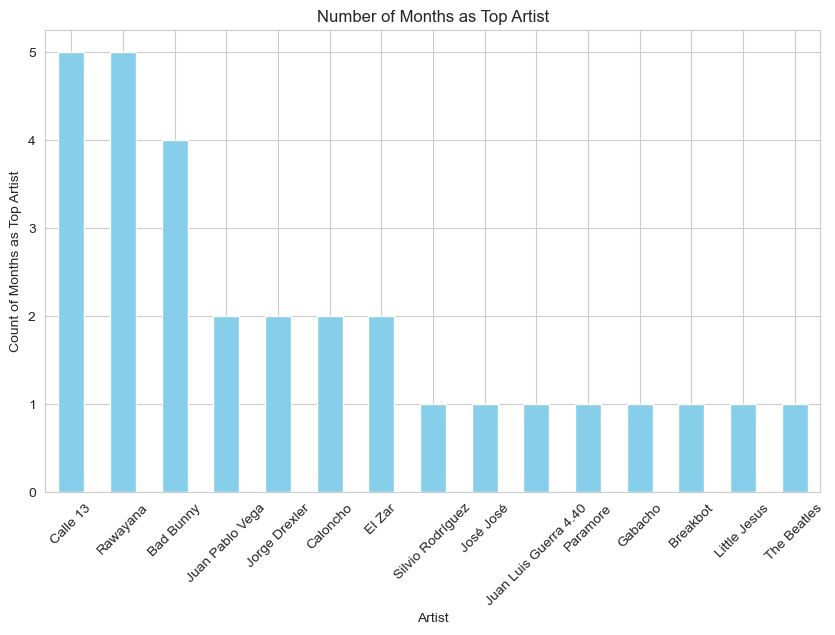

In [21]:
# 1. Create a copy of the original DataFrame
df_monthly_analysis = df.copy()

# 2. Convert timestamp to datetime (if not already)
df_monthly_analysis['ts'] = pd.to_datetime(df_monthly_analysis['ts'])

# 3. Create a 'year_month' column
df_monthly_analysis['year_month'] = df_monthly_analysis['ts'].dt.to_period('M')

# 4. Group by (year_month, artist_name) and sum ms_played
monthly_artist = (
    df_monthly_analysis
    .groupby(['year_month', 'artist_name'], as_index=False)['ms_played']
    .sum()
)

# 5. Sort by year_month ascending, ms_played descending
monthly_artist_sorted = monthly_artist.sort_values(
    ['year_month', 'ms_played'],
    ascending=[True, False]
)

# 6. For each year_month, keep only the row with the highest ms_played
top_artist_per_month = monthly_artist_sorted.drop_duplicates(
    subset=['year_month'],
    keep='first'
)

# 7. Count how many times each artist was top artist of the month
artist_month_count = top_artist_per_month['artist_name'].value_counts()

print("Number of months as top artist:")
print(artist_month_count)

# 8. Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
artist_month_count.plot(kind='bar', color='skyblue')
plt.title('Number of Months as Top Artist')
plt.xlabel('Artist')
plt.ylabel('Count of Months as Top Artist')
plt.xticks(rotation=45)
plt.show()


In [24]:
top_artist_per_month_sorted = top_artist_per_month.sort_values('year_month')
top_artist_per_month_sorted.head()


,year_month,artist_name,ms_played
42,2022-10,Calle 13,5621446
566,2022-11,Rawayana,8985724
1042,2022-12,Rawayana,10964602
1201,2023-01,Bad Bunny,4592576
1634,2023-02,Bad Bunny,11142509


In [25]:
for row in top_artist_per_month_sorted.itertuples():
    # row.year_month is a Period object, so convert it to string if needed
    ym_str = str(row.year_month)
    artist = row.artist_name
    print(f"{ym_str}: {artist}")


2022-10: Calle 13
2022-11: Rawayana
2022-12: Rawayana
2023-01: Bad Bunny
2023-02: Bad Bunny
2023-03: Juan Pablo Vega
2023-04: Silvio Rodríguez
2023-05: Bad Bunny
2023-06: Calle 13
2023-07: José José
2023-08: Juan Luis Guerra 4.40
2023-09: Juan Pablo Vega
2023-10: Rawayana
2023-11: Jorge Drexler
2023-12: Rawayana
2024-01: Calle 13
2024-02: Calle 13
2024-03: Calle 13
2024-04: Paramore
2024-05: Gabacho
2024-06: Rawayana
2024-07: Jorge Drexler
2024-08: Breakbot
2024-09: Caloncho
2024-10: El Zar
2024-11: Caloncho
2024-12: Little Jesus
2025-01: Bad Bunny
2025-02: The Beatles
2025-03: El Zar


In [23]:
# 1. Create a copy of the original DataFrame
df_weekly_analysis = df.copy()

# 2. Convert timestamp to datetime (if not already)
df_weekly_analysis['ts'] = pd.to_datetime(df_weekly_analysis['ts'])

# 3. Create a 'year_week' column using weekly periods
#    dt.to_period('W') groups by ISO weeks (Monday to Sunday)
df_weekly_analysis['year_week'] = df_weekly_analysis['ts'].dt.to_period('W')

# 4. Group by (year_week, artist_name) and sum ms_played
weekly_artist = (
    df_weekly_analysis
    .groupby(['year_week', 'artist_name'], as_index=False)['ms_played']
    .sum()
)

# 5. Sort by year_week ascending, ms_played descending
weekly_artist_sorted = weekly_artist.sort_values(
    ['year_week', 'ms_played'],
    ascending=[True, False]
)

# 6. For each year_week, keep only the row with the highest ms_played
top_artist_per_week = weekly_artist_sorted.drop_duplicates(
    subset=['year_week'],
    keep='first'
)

# 7. Count how many times each artist was top artist of the week
artist_week_count = top_artist_per_week['artist_name'].value_counts()

print("Number of weeks as top artist:")
print(artist_week_count)


Number of weeks as top artist:
Rawayana                          15
Bad Bunny                         13
Jorge Drexler                      7
Calle 13                           6
Juan Pablo Vega                    6
Caloncho                           4
Little Jesus                       4
El Zar                             4
Katie Tupper                       3
NATHY PELUSO                       3
Parcels                            3
Paramore                           2
Laura Pérez                        2
Fruko Y Sus Tesos                  2
Durand Jones & The Indications     2
ARIEL                              1
Trueno                             1
El Kanka                           1
Rauw Alejandro                     1
Gabacho                            1
Bandalos Chinos                    1
Ximena Sariñana                    1
Juan Luis Guerra 4.40              1
Outkast                            1
Esteman                            1
Breakbot                           1
No Te V

/Users/emiliomantilla/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


# Session Analysis

In [26]:
# 1. Create a copy of the original DataFrame for session analysis
df_session_analysis = df.sort_values(by='ts').copy()

# 2. Define a session gap threshold (e.g., 30 minutes)
SESSION_GAP = pd.Timedelta(minutes=30)

# 3. Add a 'session_id' column to mark each session
df_session_analysis['session_id'] = 0
current_session_id = 1
df_session_analysis.iloc[0, df_session_analysis.columns.get_loc('session_id')] = current_session_id

# Iterate over rows to determine if we start a new session
for i in range(1, len(df_session_analysis)):
    current_ts = df_session_analysis.iloc[i]['ts']
    prev_ts = df_session_analysis.iloc[i-1]['ts']
    time_diff = current_ts - prev_ts

    if time_diff > SESSION_GAP:
        current_session_id += 1

    df_session_analysis.iloc[i, df_session_analysis.columns.get_loc('session_id')] = current_session_id

# 4. Summarize each session's stats
session_stats = (
    df_session_analysis.groupby('session_id')
      .agg(
          start_time=('ts', 'min'),
          end_time=('ts', 'max'),
          total_tracks=('track_name', 'count'),
          total_ms_played=('ms_played', 'sum')
      )
      .reset_index()
)

# 5. Calculate session duration (minutes) and total minutes played
session_stats['session_duration_min'] = (
    session_stats['end_time'] - session_stats['start_time']
).dt.total_seconds() / 60.0

session_stats['total_minutes_played'] = session_stats['total_ms_played'] / 60000.0

# 6. Inspect the result
session_stats.head()

,session_id,start_time,end_time,total_tracks,total_ms_played,session_duration_min,total_minutes_played
0,1,2022-10-06 14:40:58+00:00,2022-10-06 17:47:01+00:00,42,7224697,186.050000,120.411617
1,2,2022-10-06 20:07:55+00:00,2022-10-06 20:48:53+00:00,11,2191309,40.966667,36.521817
2,3,2022-10-06 21:22:38+00:00,2022-10-06 22:21:21+00:00,21,2767349,58.716667,46.122483
3,4,2022-10-06 23:19:33+00:00,2022-10-06 23:49:37+00:00,17,1849960,30.066667,30.832667
4,5,2022-10-07 17:13:04+00:00,2022-10-07 18:39:18+00:00,25,2497875,86.233333,41.631250


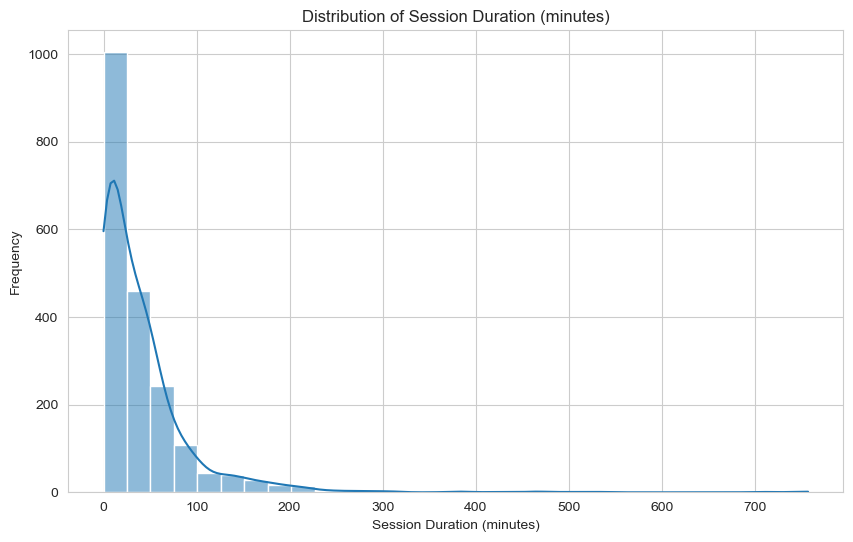

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(session_stats['session_duration_min'], bins=30, kde=True)
plt.title("Distribution of Session Duration (minutes)")
plt.xlabel("Session Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

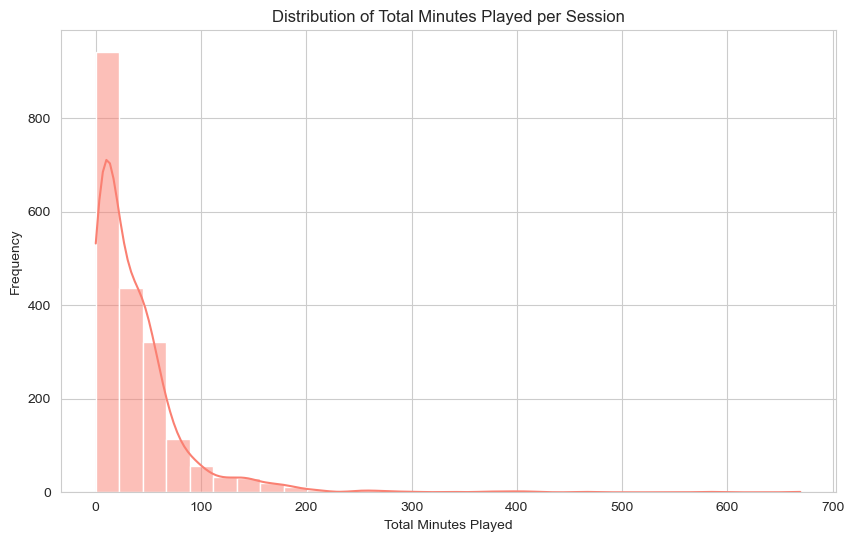

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(session_stats['total_minutes_played'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Total Minutes Played per Session")
plt.xlabel("Total Minutes Played")
plt.ylabel("Frequency")
plt.show()

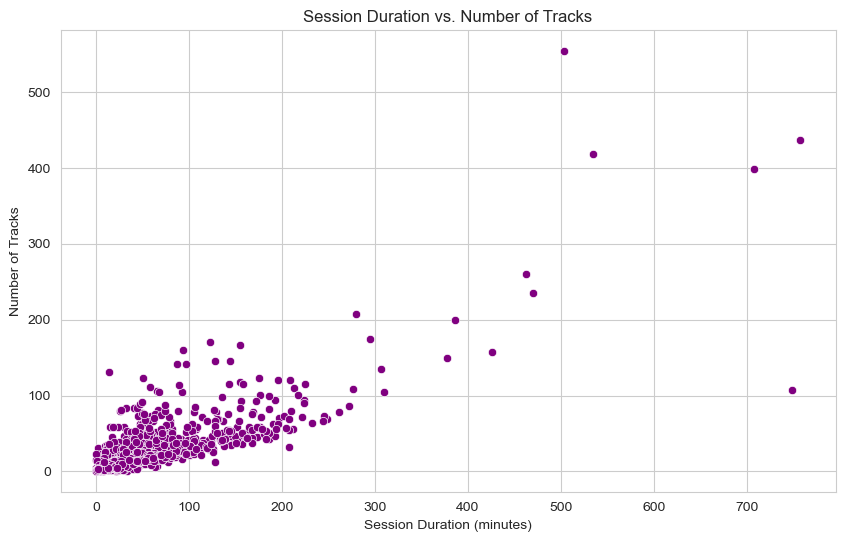

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=session_stats, x='session_duration_min', y='total_tracks', color='purple')
plt.title("Session Duration vs. Number of Tracks")
plt.xlabel("Session Duration (minutes)")
plt.ylabel("Number of Tracks")
plt.show()


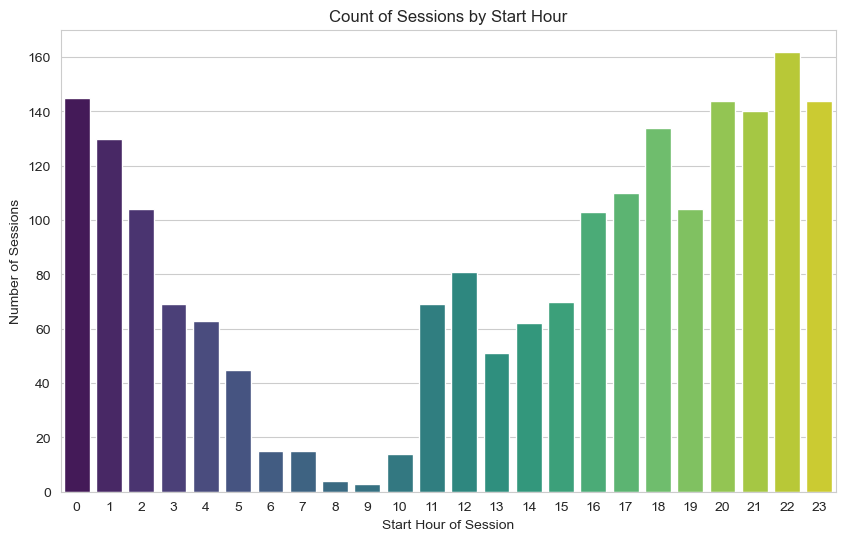

In [30]:
# Create a new column for the hour of the session's start
session_stats['start_hour'] = session_stats['start_time'].dt.hour

plt.figure(figsize=(10,6))
sns.countplot(x='start_hour', data=session_stats, palette='viridis')
plt.title("Count of Sessions by Start Hour")
plt.xlabel("Start Hour of Session")
plt.ylabel("Number of Sessions")
plt.show()


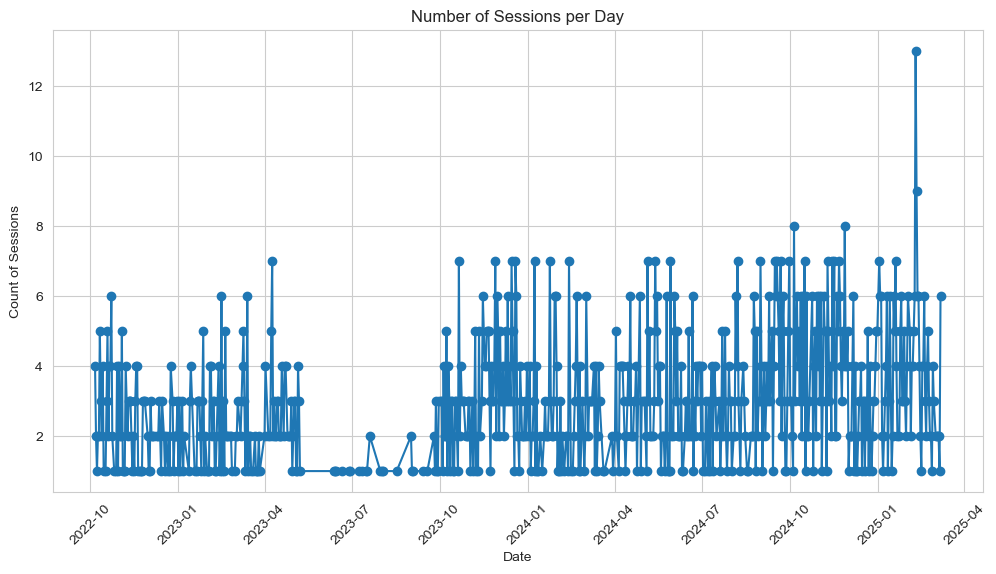

In [31]:
# Extract date from the session start time
session_stats['date'] = session_stats['start_time'].dt.date

# Count sessions per day
sessions_per_day = session_stats.groupby('date').size()

plt.figure(figsize=(12,6))
sessions_per_day.plot(kind='line', marker='o')
plt.title("Number of Sessions per Day")
plt.xlabel("Date")
plt.ylabel("Count of Sessions")
plt.xticks(rotation=45)
plt.show()


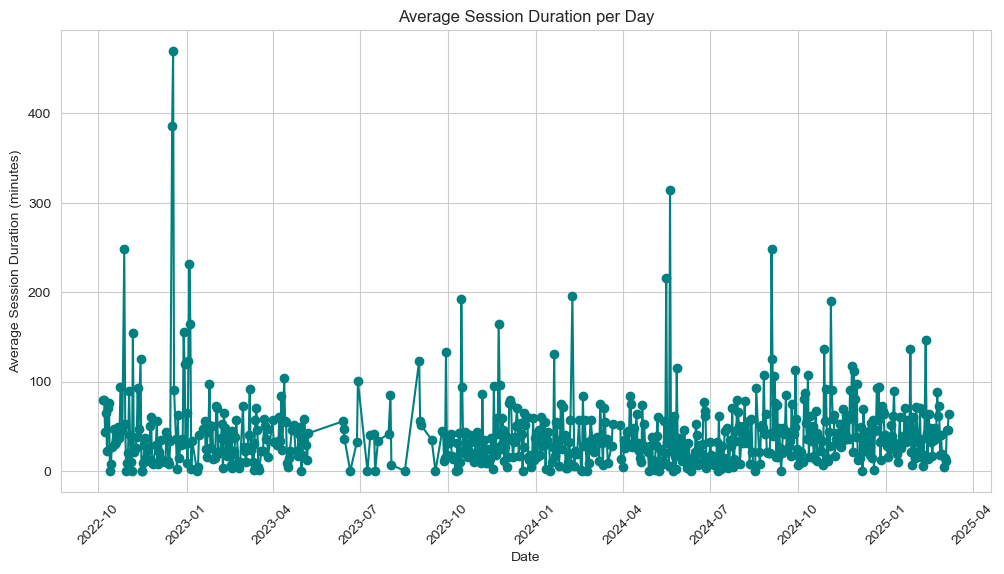

In [32]:
avg_duration_per_day = session_stats.groupby('date')['session_duration_min'].mean()

plt.figure(figsize=(12,6))
avg_duration_per_day.plot(kind='line', marker='o', color='teal')
plt.title("Average Session Duration per Day")
plt.xlabel("Date")
plt.ylabel("Average Session Duration (minutes)")
plt.xticks(rotation=45)
plt.show()


In [33]:
# 5. Overall Skip Rate
if 'skipped' in df_session_analysis.columns:
    total_tracks = len(df_session_analysis)
    skipped_tracks = df_session_analysis['skipped'].sum()  # assuming 'skipped' is boolean
    overall_skip_rate = skipped_tracks / total_tracks
    print(f"Overall Skip Rate: {overall_skip_rate:.2%}")
else:
    print("Column 'skipped' not found in the data.")


Overall Skip Rate: 53.78%


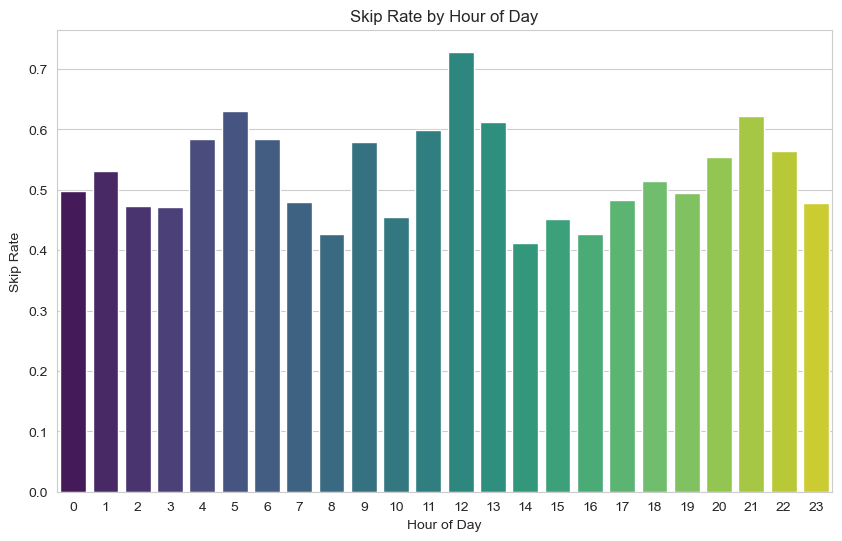

In [36]:
# 6. Skip Rate by Hour of Day
if 'hour' not in df_session_analysis.columns:
    # If 'hour' isn't available, create it from 'ts'
    df_session_analysis['hour'] = df_session_analysis['ts'].dt.hour

if 'skipped' in df_session_analysis.columns:
    hour_skip_stats = (
        df_session_analysis.groupby('hour')['skipped']
        .mean()
        .reset_index(name='skip_rate')
    )
    hour_skip_stats.sort_values('skip_rate', ascending=False, inplace=True)
#    print("Skip Rate by Hour:")
#    print(hour_skip_stats)
    
 # Optional: Plot skip rate by hour
    plt.figure(figsize=(10,6))
    sns.barplot(x='hour', y='skip_rate', data=hour_skip_stats, palette='viridis')
    plt.title('Skip Rate by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Skip Rate')
    plt.show()

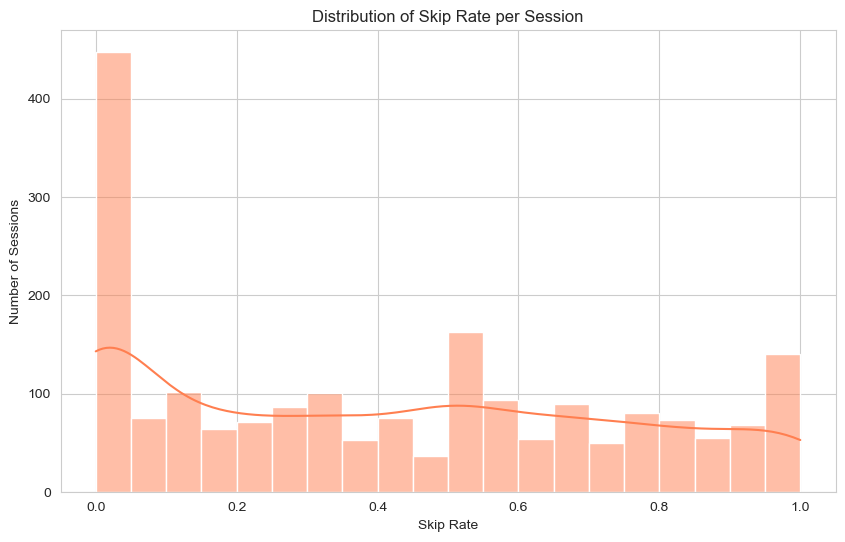

In [44]:
# 7. Skip Patterns Over Sessions
if 'skipped' in df_session_analysis.columns:
    session_skip_stats = (
        df_session_analysis.groupby('session_id')['skipped']
        .mean()
        .reset_index(name='skip_rate')
    )
#    print("Skip Rate per Session (first 10 sessions):")
#    print(session_skip_stats.head(10))

   # Optional: Visualize distribution of session skip rates
    plt.figure(figsize=(10,6))
    sns.histplot(session_skip_stats['skip_rate'], bins=20, kde=True, color='coral')
    plt.title('Distribution of Skip Rate per Session')
    plt.xlabel('Skip Rate')
    plt.ylabel('Number of Sessions')
    plt.show()